In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0202.csv'
case0202 = pd.read_csv(path)

In [23]:
from scipy.stats import ttest_rel, ttest_1samp, shapiro

In [ ]:
case0202

,Unaffected,Affected
0,1.94,1.27
1,1.44,1.63
2,1.56,1.47
3,1.58,1.39
4,2.06,1.93
5,1.66,1.26
6,1.75,1.71
7,1.77,1.67
8,1.78,1.28
9,1.92,1.85


In [5]:
case0202.melt()

,variable,value
0,Unaffected,1.94
1,Unaffected,1.44
2,Unaffected,1.56
3,Unaffected,1.58
4,Unaffected,2.06
5,Unaffected,1.66
6,Unaffected,1.75
7,Unaffected,1.77
8,Unaffected,1.78
9,Unaffected,1.92


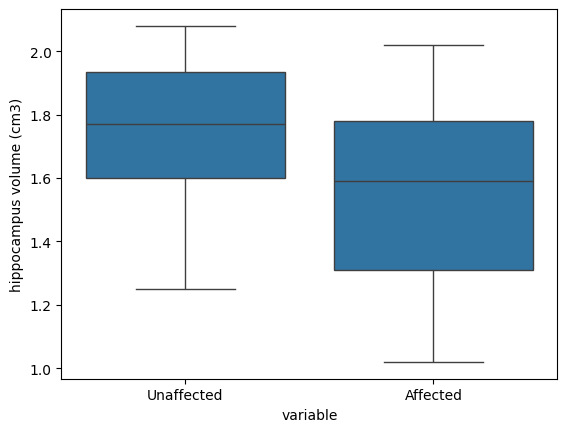

In [7]:
sns.boxplot(x = case0202.melt()['variable'], y = case0202.melt()['value'])
plt.ylabel("hippocampus volume (cm3)")
plt.show()

In [3]:
# Calculate the difference D
D = case0202['Unaffected'] - case0202['Affected']

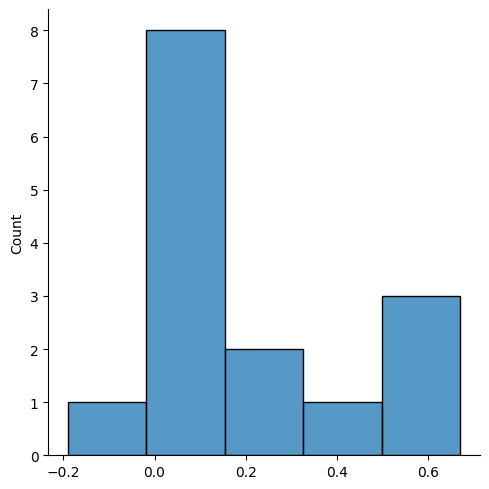

In [11]:
sns.displot(D)
plt.show()


In [24]:
#normality check
shapiro(D)

ShapiroResult(statistic=0.9044326543807983, pvalue=0.11125410348176956)

In [13]:
#As a two sample paired test
res = ttest_rel(case0202['Unaffected'], case0202['Affected'])
print(res)
print(res.confidence_interval(confidence_level=0.95))

TtestResult(statistic=3.2289280810622945, pvalue=0.006061543639348829, df=14)
ConfidenceInterval(low=0.06670410469491997, high=0.3306292286384134)


In [20]:
#As a one sample t-test
res = ttest_1samp(D, 0)
print(res)
print(res.confidence_interval(confidence_level=0.95))

TtestResult(statistic=3.2289280810622945, pvalue=0.006061543639348829, df=14)
ConfidenceInterval(low=0.06670410469491997, high=0.3306292286384134)


# Alternatively, if you use pingouin

In [ ]:
!pip install pingouin

In [16]:
import pingouin as pg

In [21]:
#As a paired two sample t-test with pingouin
pg.ttest(x = case0202['Unaffected'], y = case0202['Affected'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.228928,14,two-sided,0.006062,"[0.07, 0.33]",0.726575,8.427,0.744472


In [ ]:
# As a one-sample t-test using pingouin
pg.ttest(D, y = 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.228928,14,two-sided,0.006062,"[0.07, 0.33]",0.833706,8.427,0.851087


# two sample t tests (Finches study)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, levene, probplot

In [31]:
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0201.csv'
data = pd.read_csv(path)
data.head()

,Year,Depth
0,1976,6.2
1,1976,6.8
2,1976,7.1
3,1976,7.1
4,1976,7.4


In [32]:
# Convert the numerical variable 'Year' into a categorical factor
data['yearFactor'] = pd.Categorical(data['Year'])

In [34]:
data[data['yearFactor']==1976].shape

(89, 3)

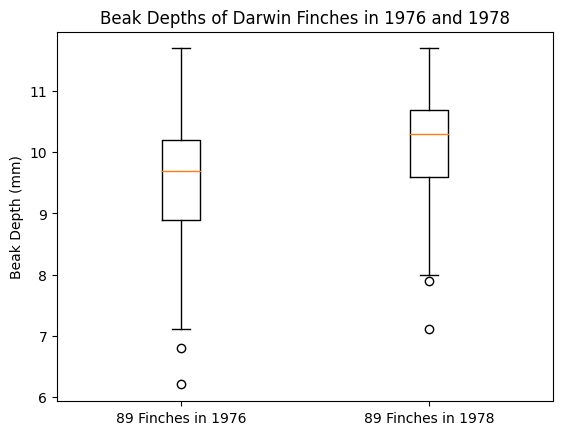

In [33]:
# Boxplot
plt.boxplot([data['Depth'][data['yearFactor'] == 1976], data['Depth'][data['yearFactor'] == 1978]],
            labels=["89 Finches in 1976", "89 Finches in 1978"])
plt.ylabel("Beak Depth (mm)")
plt.title("Beak Depths of Darwin Finches in 1976 and 1978")
plt.show()

In [35]:
# Two-sample t-test
t_stat, p_value = ttest_ind(data['Depth'][data['yearFactor'] == 1976], data['Depth'][data['yearFactor'] == 1978], equal_var=True)
print("Two-sample t-test p-value (two-sided):", p_value)

Two-sample t-test p-value (two-sided): 8.649515391607623e-06


In [36]:
# One-sided t-test
t_stat_less, p_value_less = ttest_ind(data['Depth'][data['yearFactor'] == 1976], data['Depth'][data['yearFactor'] == 1978], alternative='less', equal_var=True)
print("One-sided t-test p-value (group 1 mean is less):", p_value_less)


One-sided t-test p-value (group 1 mean is less): 4.3247576958038114e-06


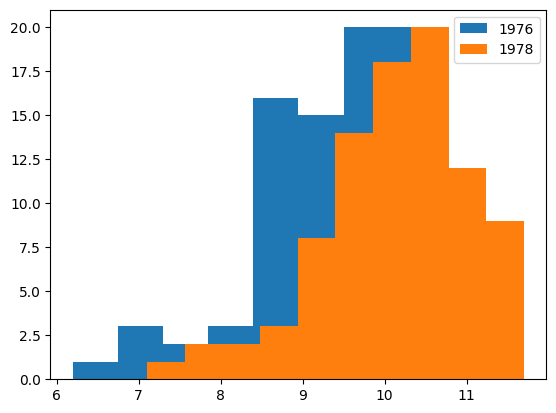

In [37]:
# Histograms and QQ plots for normality testing
plt.hist(data['Depth'][data['yearFactor'] == 1976], label="1976")
plt.hist(data['Depth'][data['yearFactor'] == 1978], label="1978")
plt.legend()
plt.show()

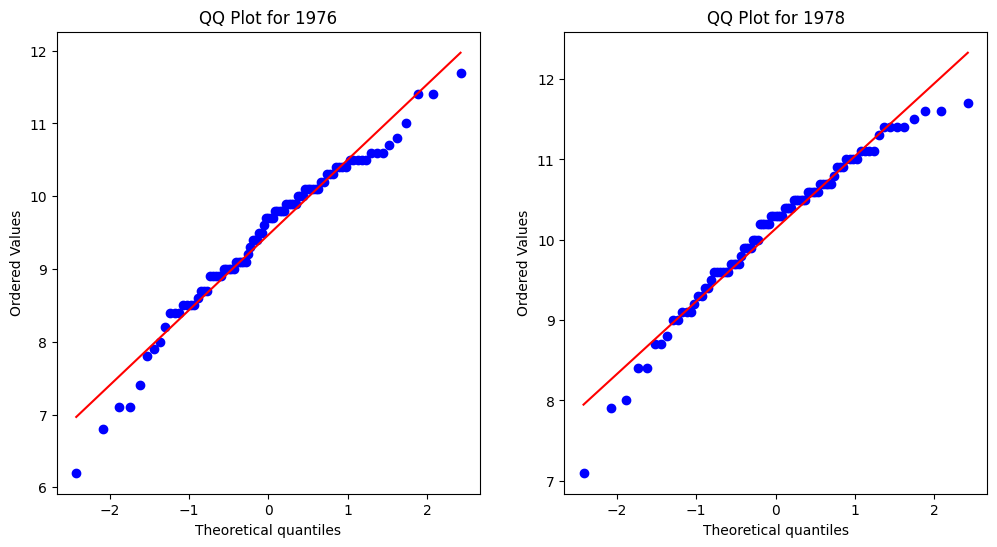

In [40]:
# QQ plots for normality
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
probplot(data['Depth'][data['yearFactor'] == 1976], dist="norm", plot=plt)
plt.title("QQ Plot for 1976")

plt.subplot(1, 2, 2)
probplot(data['Depth'][data['yearFactor'] == 1978], dist="norm", plot=plt)
plt.title("QQ Plot for 1978")

plt.show()

In [41]:
# Shapiro-Wilk test for normality
p_value_shapiro_1976 = shapiro(data['Depth'][data['yearFactor'] == 1976]).pvalue
p_value_shapiro_1978 = shapiro(data['Depth'][data['yearFactor'] == 1978]).pvalue
print("Shapiro-Wilk test p-value for 1976:", p_value_shapiro_1976)
print("Shapiro-Wilk test p-value for 1978:", p_value_shapiro_1978)

Shapiro-Wilk test p-value for 1976: 0.02336261235177517
Shapiro-Wilk test p-value for 1978: 0.015372125431895256


# summarize the Shapiro test. Is there evidence that the data set is normally distributed?
#Do we have a big enough sample size to invoke the central limit theorem and use t tools anyway?

In [42]:
# Levene's test for equal variance
_, p_value_levene = levene(data['Depth'][data['yearFactor'] == 1976], data['Depth'][data['yearFactor'] == 1978])
print("Levene's test p-value for equal variance:", p_value_levene)

Levene's test p-value for equal variance: 0.24494983167352935
